## Importing the Main Libraries

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import os

### Data Proccesing 

In [39]:
#loading the data from csv file 
filepath= os.path.join(os.getcwd(),'car data.csv')
dataset=pd.read_csv(filepath)

In [40]:
#looking at first 5 rows
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
#Checking for the number data
dataset.shape

(301, 9)

In [42]:
#checking for null values
dataset.isna().sum()
#There is no null values so it's fine to procceude 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [43]:
#getting more info about the data
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [44]:
#more and more info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
#checking the distribution of cateogrical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [46]:
## encoding the cateogrical data
# encoding Fuel Type Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding Transmission
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [47]:
#Checking if the encoding is apllied
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [71]:
#Splitting the data
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=dataset['Selling_Price']

In [72]:
# Splitting Trainning and Test Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

### Model Building 

1.Linear Reggresion

In [73]:
#loading the linear regression model
reg=LinearRegression()

In [74]:
reg.fit(X_train,y_train)

LinearRegression()

In [75]:
#Model Evalution 
#prediciting on trainning data
train_pred=reg.predict(X_train)

In [76]:
#R-square error
error_score=metrics.r2_score(y_train,train_pred)
print('R squared error: ',error_score)

R squared error:  0.8799451660493698


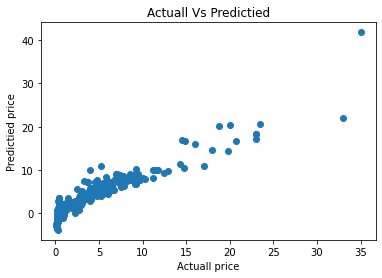

In [77]:
#Visulize the actual price and Predicted price
plt.scatter(y_train,train_pred)
plt.xlabel('Actuall price')
plt.ylabel('Predictied price')
plt.title('Actuall Vs Predictied')
plt.show()

In [78]:
#prediciting on trainning data
test_pred=reg.predict(X_test)

In [66]:
#R-square error
error_score=metrics.r2_score(y_test,test_pred)
print('R squared error: ',error_score)

ValueError: Found input variables with inconsistent numbers of samples: [31, 270]

In [82]:
X_test.shape

(31, 7)